In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')



In [2]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
for col in df_train.columns:
    msg = 'colums: {:<10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums: Survived   	 Percent of NaN value: 0.000000%
colums: Pclass     	 Percent of NaN value: 0.000000%
colums: Name       	 Percent of NaN value: 0.000000%
colums: Sex        	 Percent of NaN value: 0.000000%
colums: Age        	 Percent of NaN value: 19.865320%
colums: SibSp      	 Percent of NaN value: 0.000000%
colums: Parch      	 Percent of NaN value: 0.000000%
colums: Ticket     	 Percent of NaN value: 0.000000%
colums: Fare       	 Percent of NaN value: 0.000000%
colums: Cabin      	 Percent of NaN value: 77.104377%
colums: Embarked   	 Percent of NaN value: 0.224467%


In [4]:
for col in df_test.columns:
    msg = 'colums: {:>10} \t Percent of NaN value: {:2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)


colums: PassengerId 	 Percent of NaN value: 0.000000%
colums:     Pclass 	 Percent of NaN value: 0.000000%
colums:       Name 	 Percent of NaN value: 0.000000%
colums:        Sex 	 Percent of NaN value: 0.000000%
colums:        Age 	 Percent of NaN value: 20.574163%
colums:      SibSp 	 Percent of NaN value: 0.000000%
colums:      Parch 	 Percent of NaN value: 0.000000%
colums:     Ticket 	 Percent of NaN value: 0.000000%
colums:       Fare 	 Percent of NaN value: 0.239234%
colums:      Cabin 	 Percent of NaN value: 78.229665%
colums:   Embarked 	 Percent of NaN value: 0.000000%


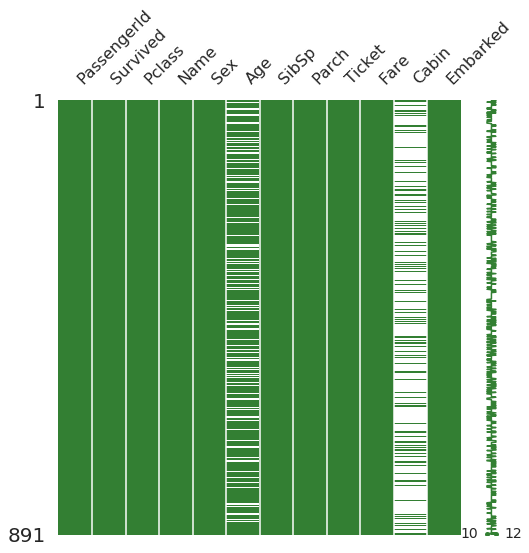

In [5]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

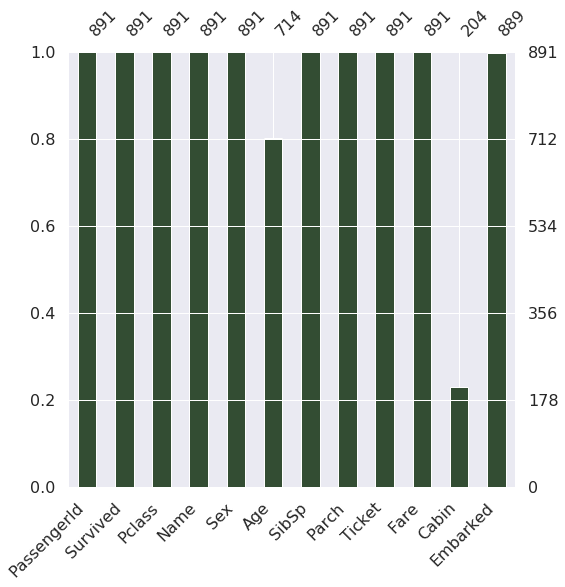

In [6]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.3, 0.2))

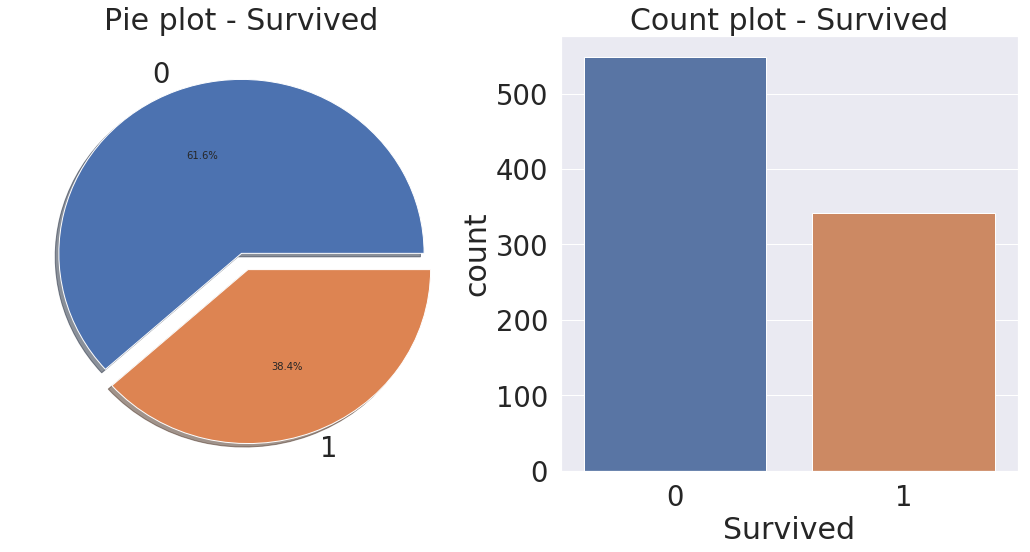

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))#도화지

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [8]:
# df_train['Survived'].value_counts().plot().pie(explode)

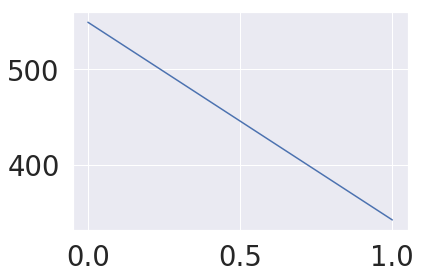

In [9]:
plt.plot(df_train['Survived'].value_counts())

2.1 Pclass

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [13]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot().bar()

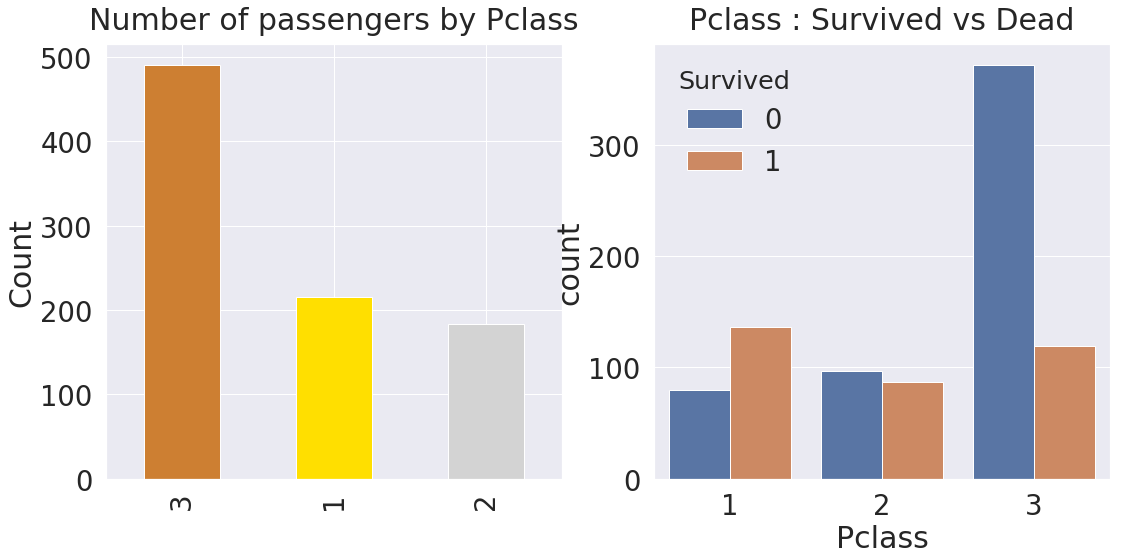

In [14]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

2.2 Sex

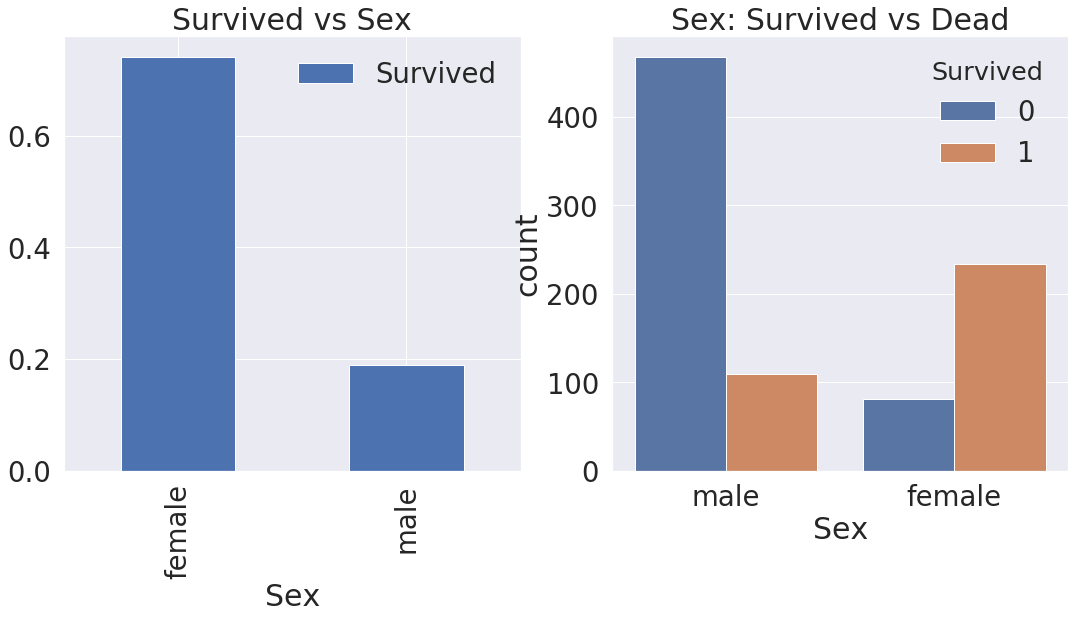

In [15]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [16]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Pclass and Sex


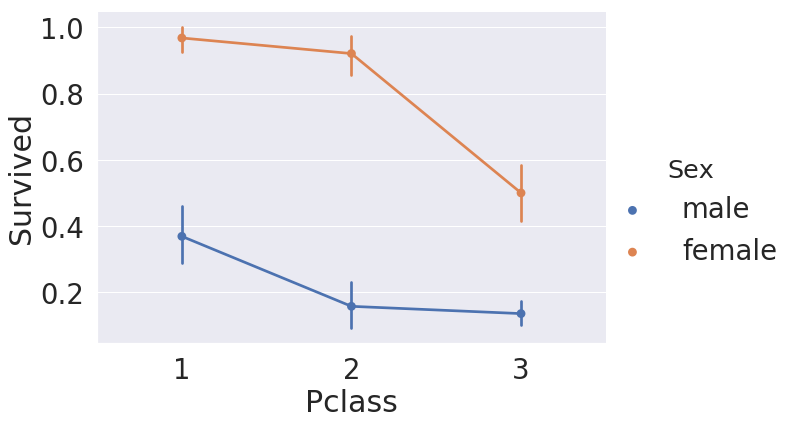

In [17]:
sns.factorplot('Pclass','Survived',hue='Sex',data = df_train, size=6, aspect=1.5)

1. Lady first
2. Money brings survival?

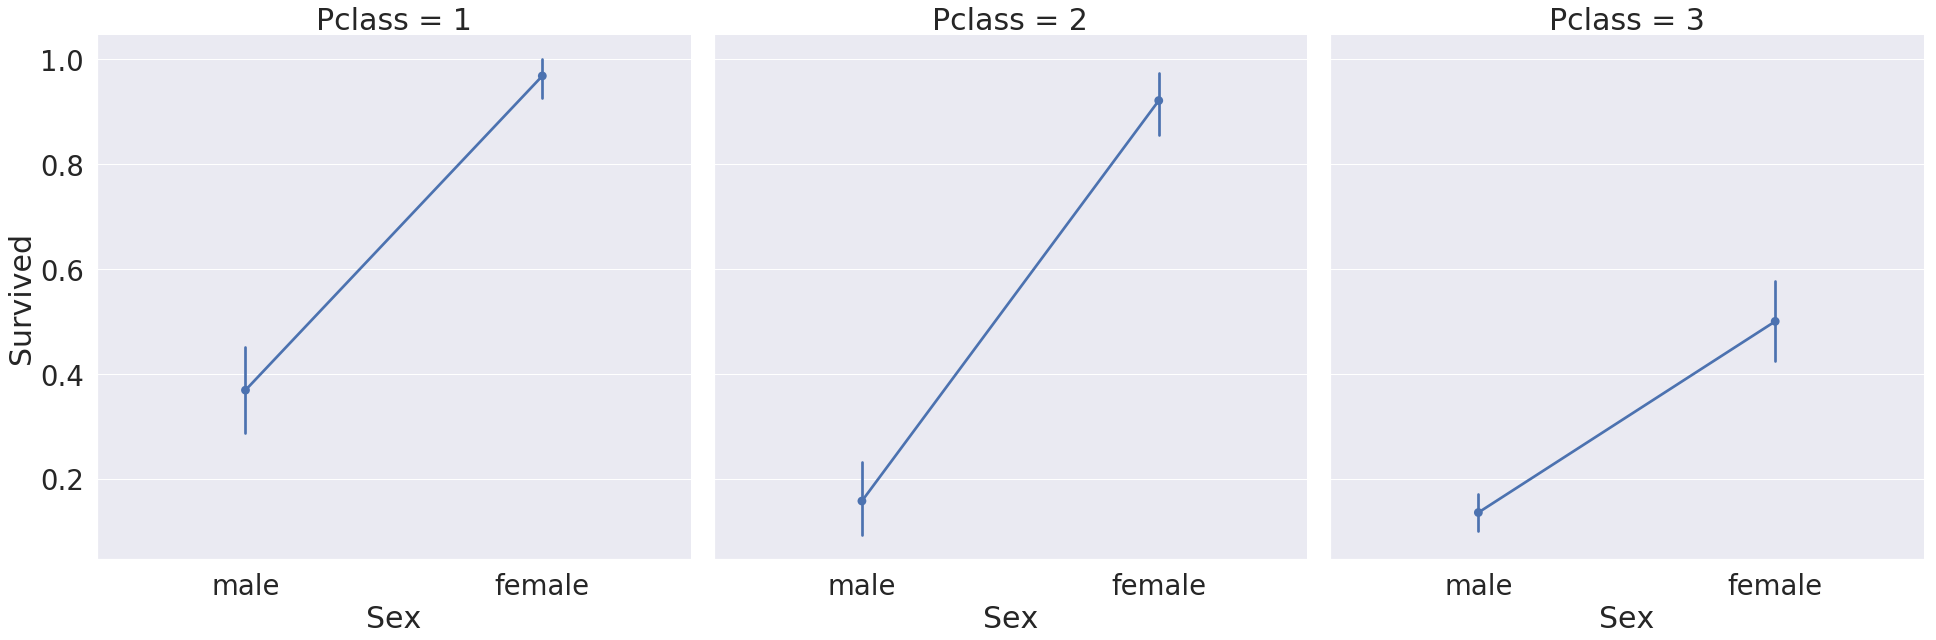

In [18]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

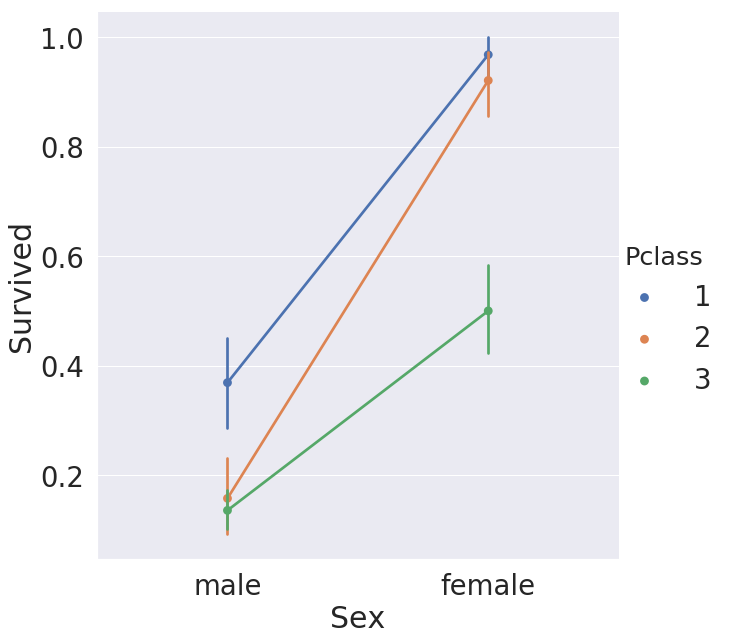

In [19]:
sns.factorplot(x='Sex', y='Survived', hue = 'Pclass', data=df_train, saturation = 5,size=9, aspect = 1)

2.3. Age

In [20]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이 : 29.7 Years


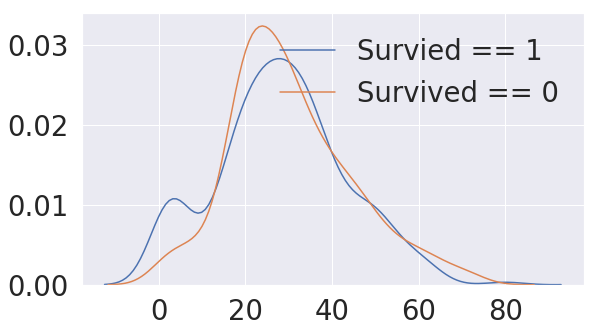

In [21]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survied == 1', 'Survived == 0'])
plt.show()

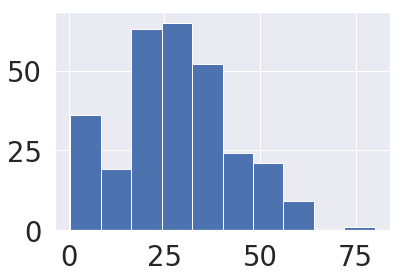

In [22]:
df_train[df_train['Survived'] == 1]['Age'].hist()

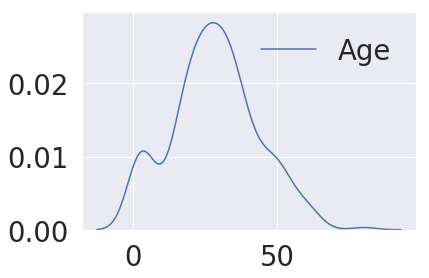

In [23]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 360x360 with 0 Axes>

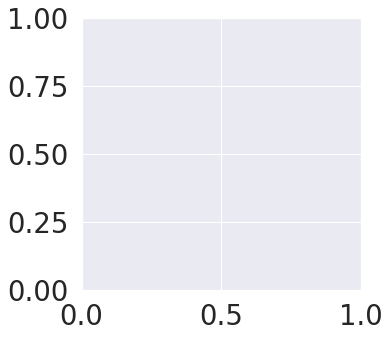

<Figure size 720x720 with 0 Axes>

In [24]:
f = plt.figure(figsize = (5,5))

f, ax = plt.subplots(1,1,figsize=(5,5))

plt.figure(figsize=(10,10))

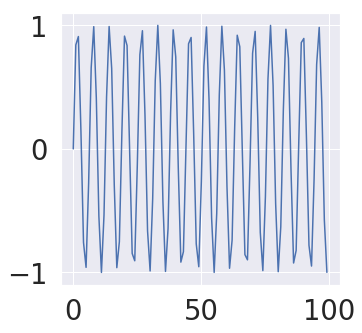

In [25]:
f = plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

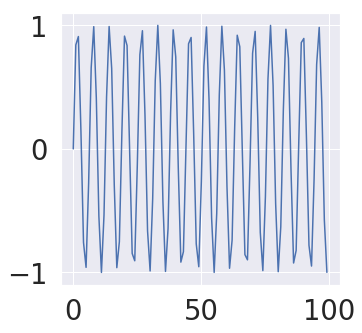

In [26]:
f, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)

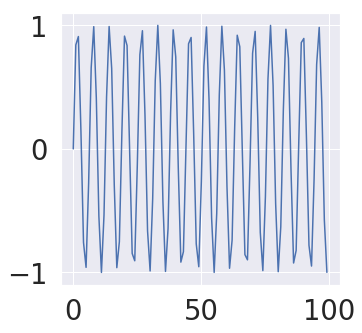

In [27]:
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

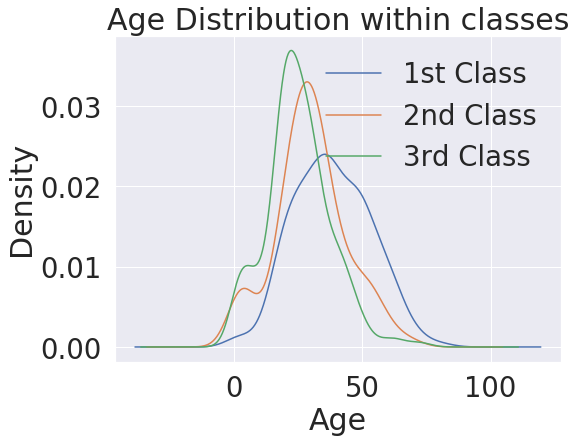

In [28]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

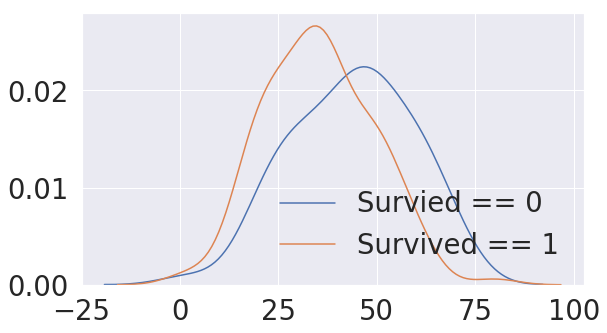

In [29]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


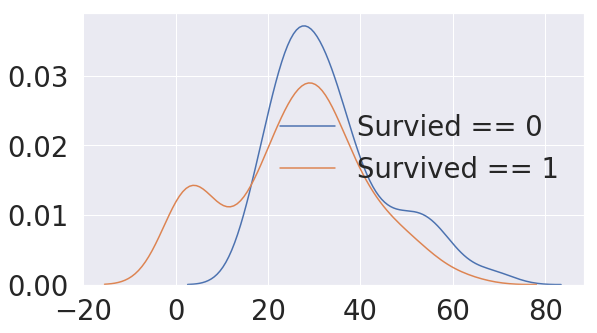

In [30]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


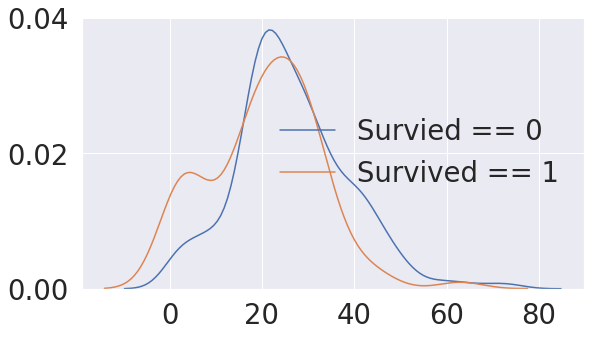

In [31]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Survied == 0', 'Survived == 1'])
plt.show()


- 1~80 살 까지 (i) 생존확률의 변화

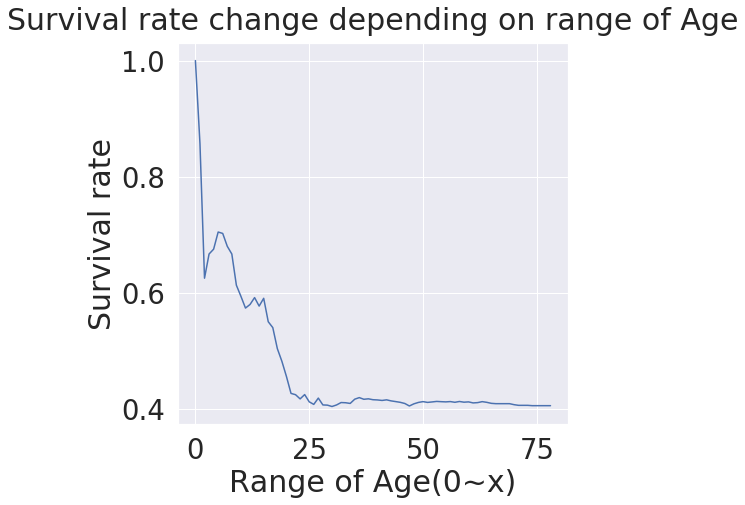

In [32]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass, Sex, Age
---



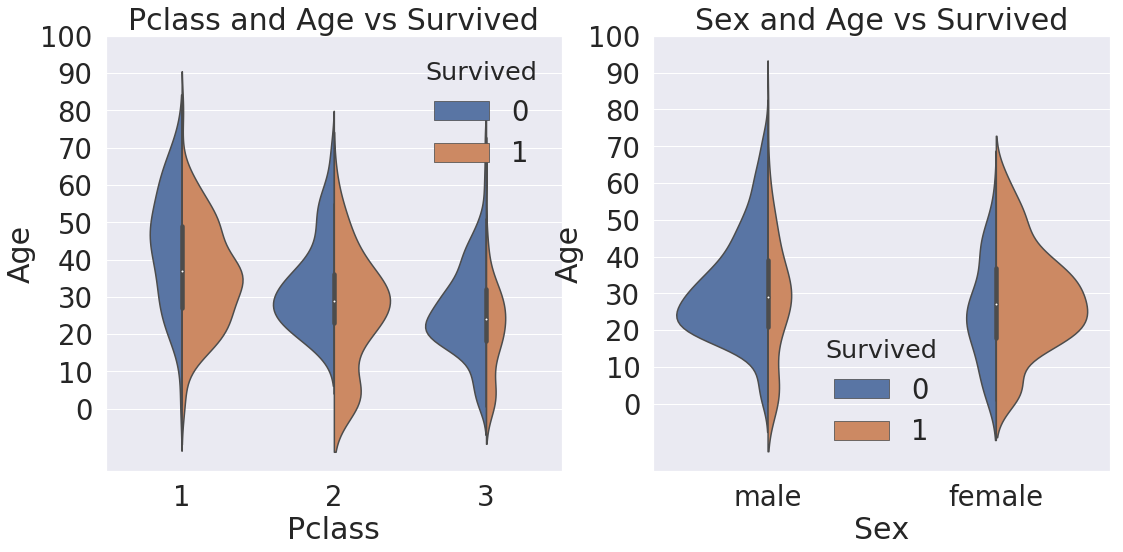

In [33]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data=df_train, scale="count",split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110, 10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked
---
- 탑승한 곳

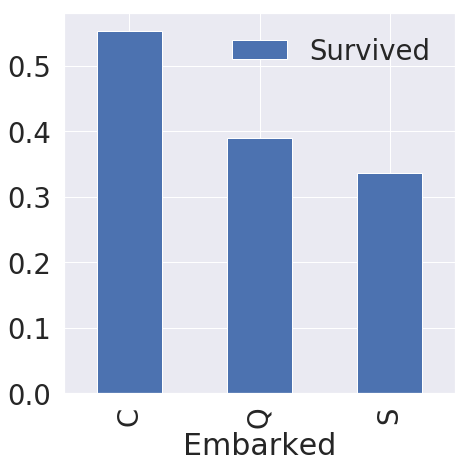

In [34]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',ascending = False).plot.bar(ax=ax)

In [35]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [36]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


- Embarked를 다른 Feature와 비교

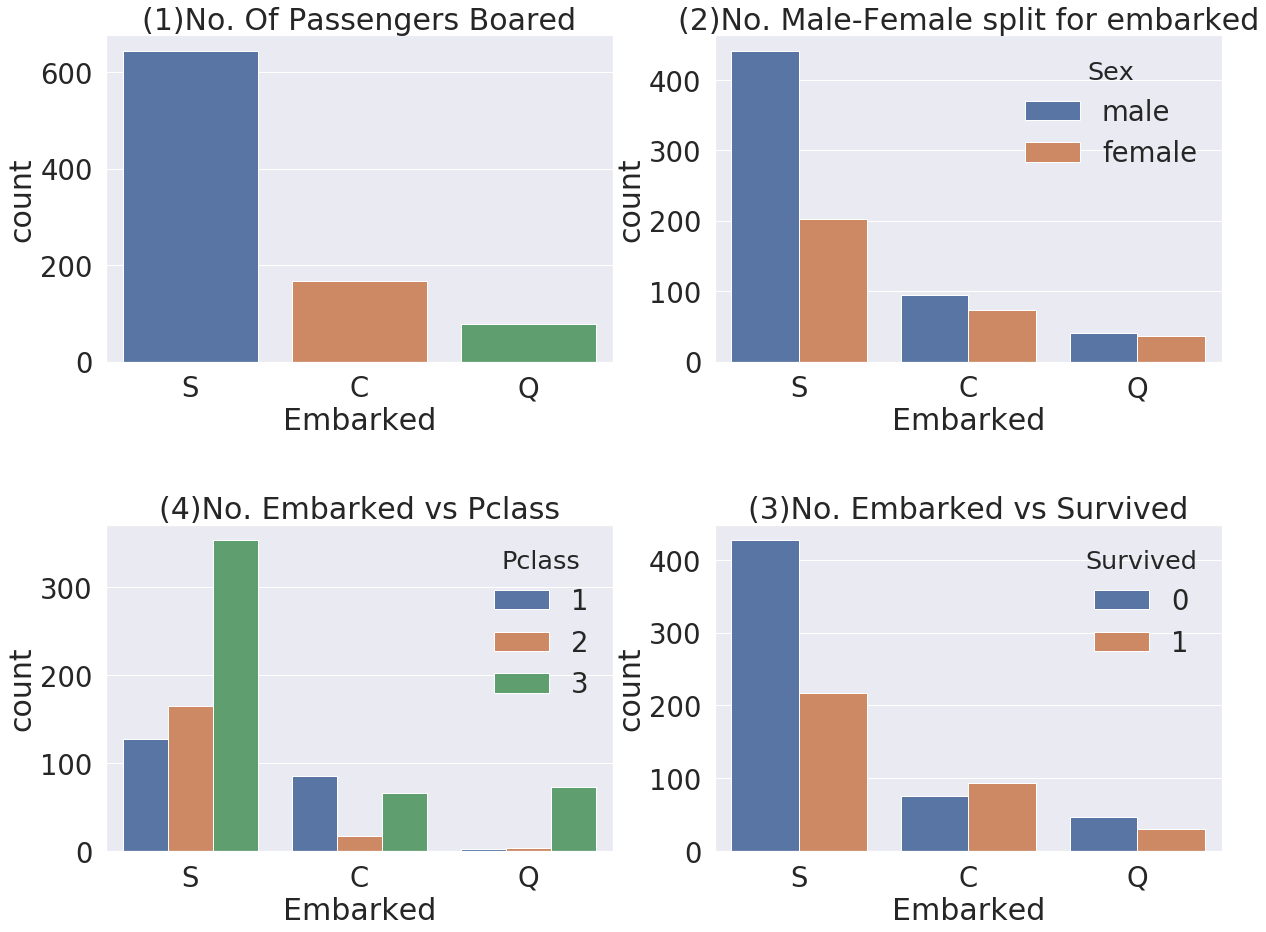

In [37]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title("(1)No. Of Passengers Boared")

sns.countplot('Embarked', hue = 'Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title("(2)No. Male-Female split for embarked")

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,1])
ax[1,1].set_title("(3)No. Embarked vs Survived")

sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax=ax[1,0])
ax[1,0].set_title("(4)No. Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)# 1행과 2행의 간격 벌려줌

plt.show()

### Family - SibSp + Parch

In [38]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [39]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Maximum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Maximum size of Family:  1


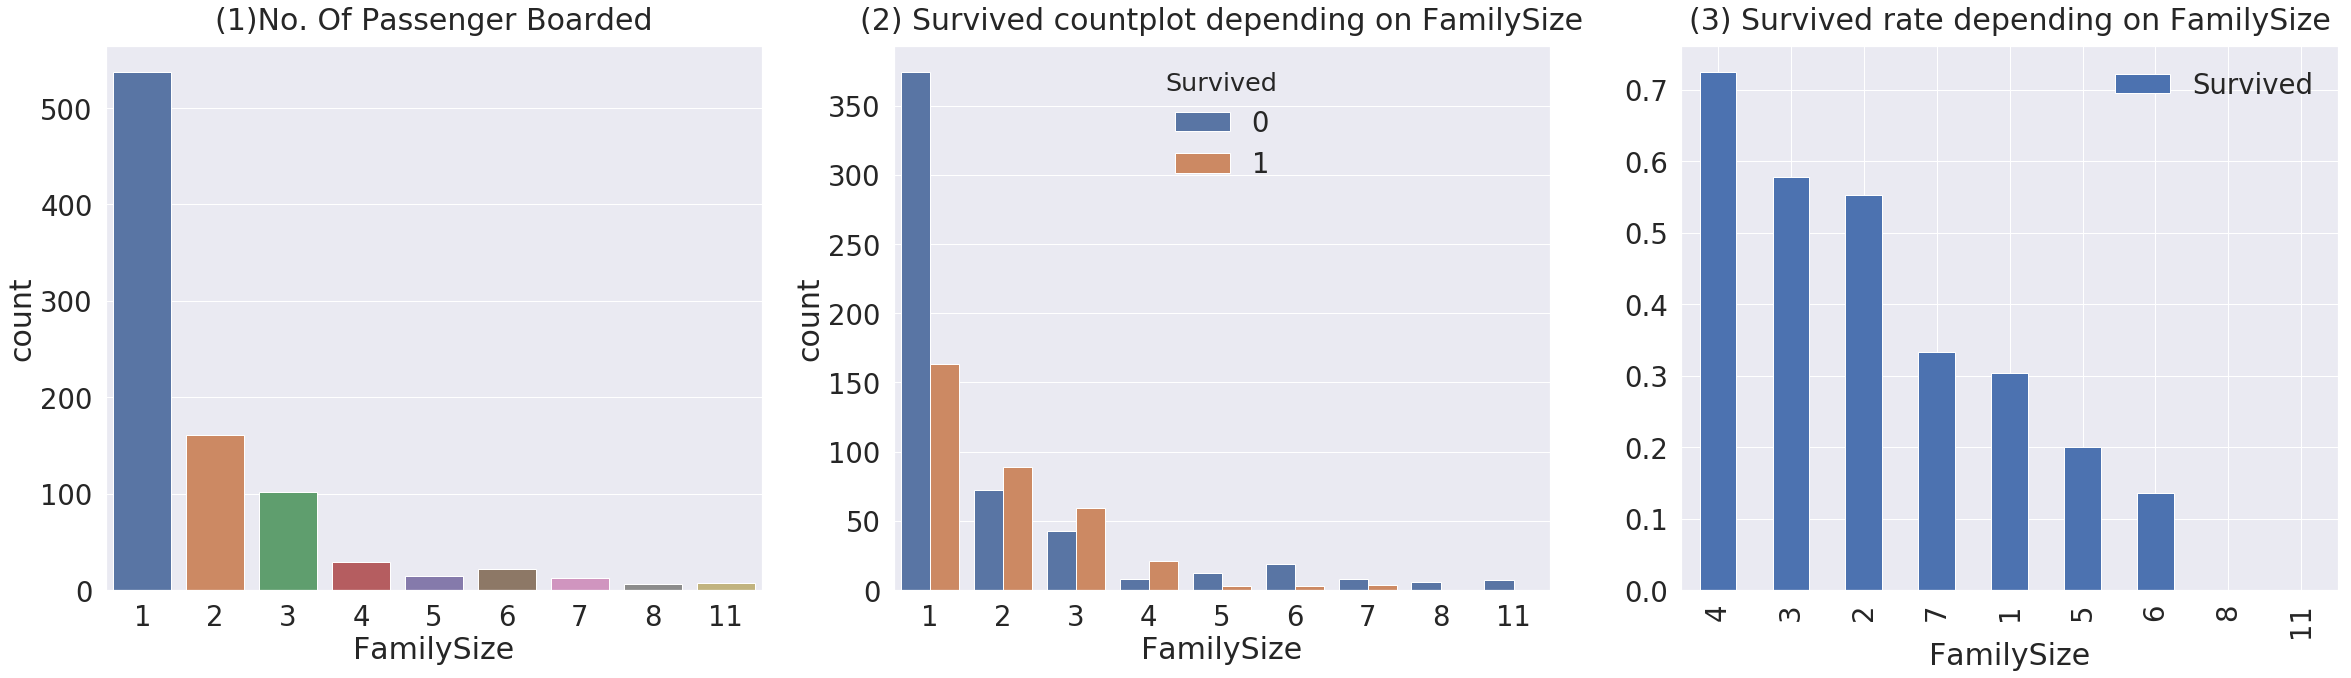

In [40]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare

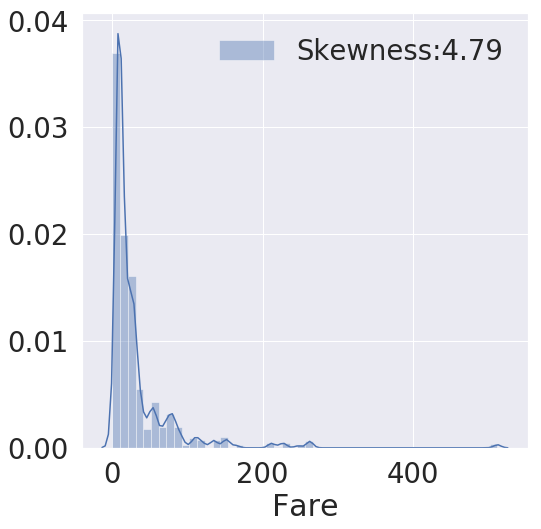

In [41]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [42]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

> skewness 가 0 으로 가겠금 하는 작업,  feature를 정확하게 바꾸는 작업,

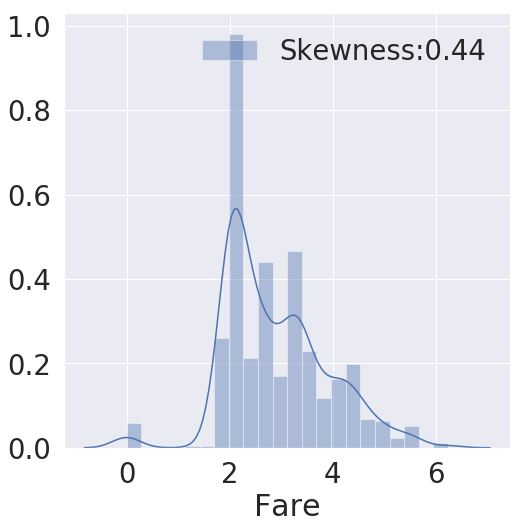

In [43]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Ticket

In [44]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
19950                4
347077               4
PC 17757             4
113760               4
LINE                 4
349909               4
17421                4
2666                 4
4133                 4
113781               4
W./C. 6608           4
SC/Paris 2123        3
C.A. 31921           3
363291               3
C.A. 34651           3
248727               3
347742               3
35273                3
F.C.C. 13529         3
PC 17760             3
PC 17582             3
29106                3
                    ..
2620                 1
SC/PARIS 2167        1
330932               1
248740               1
A/5 21171            1
349201               1
368323               1
367229               1
113804               1
A/5. 3337            1
C 7077               1
C.A. 5547            1
324669     

> feature engineering이 필요한 부분, 어떤 로직으로 정리할지 생각해 보자..

### Feature enginering

- null data를 어떻게 처리할 것인가..

In [45]:
df_train['Age'].isnull().sum()

177

In [46]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [47]:
# df_test.head()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [48]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [49]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)



In [50]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [51]:
df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

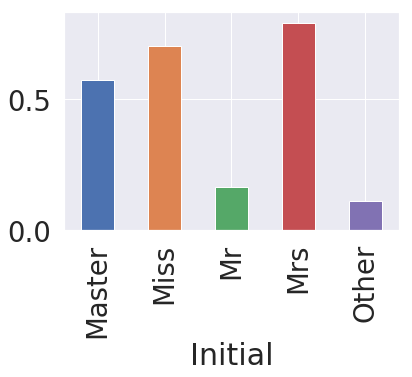

In [52]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [53]:
df_all = pd.concat([df_train, df_test])

In [54]:
df_all

,Age,Cabin,Embarked,FamilySize,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,2,1.981001,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,2,4.266662,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,1,2.070022,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,2,3.972177,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,1,2.085672,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,1,2.135148,Mr,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,1,3.948596,Mr,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,5,3.048088,Master,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,3,2.409941,Mrs,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,2,3.403555,Mrs,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [55]:
df_all.groupby('Initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.426230,3.262225,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.147170,3.065227,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,1.446174,2.676067,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,3.488188,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,2.951897,0.153846,714.923077,1.615385,0.230769,0.111111


In [56]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,2.066331,NaN,C,1,Mr
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,2.085672,NaN,S,1,Mr
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,2.740840,NaN,Q,2,Mr
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,3.076353,NaN,C,3,Mr
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,3.569533,C52,S,1,Mr


In [57]:
df_all.groupby('Initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.426230,3.262225,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.147170,3.065227,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,1.446174,2.676067,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,3.488188,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,2.951897,0.153846,714.923077,1.615385,0.230769,0.111111


In [58]:
df_train.loc[(df_train['Initial'] == 'Mr'),'Age'].head()

0     22.0
4     35.0
5      NaN
6     54.0
12    20.0
Name: Age, dtype: float64

In [59]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 45

In [60]:
df_train['Age'].isnull().sum()


0

In [61]:
df_train['Age'].isnull().sum()

0

### Feature engineering - Fill Null in Embarked and categorize Age

In [62]:
df_train['Embarked'].isnull().sum()

2

In [63]:
df_train.shape

(891, 14)

In [64]:
df_train['Embarked'].fillna('S', inplace=True)

In [65]:
df_train['Embarked'].isnull().sum()

0

In [66]:
df_train['Age_cat'] = 0

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [68]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7


In [69]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7


In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [71]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x <30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [72]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [73]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

 - any() : 하나라도 같으면 True
 - all() : 모두 같을대만 True 반환

In [74]:
df_train.drop(['Age','Age_cat_2'], axis=1,inplace =True)
df_test.drop(['Age'],axis=1,inplace=True)

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [76]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2.0


### String to Categorical and Person coefficient

In [77]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [78]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other': 4})

In [79]:
df_train.Embarked.unique()
# type(df_train.Embarked.unique()) --> numpy.array

array(['S', 'C', 'Q'], dtype=object)

In [80]:
df_train['Embarked'].value_counts()
# type(df_train['Embarked'].value_counts()) --> Series

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [83]:
df_train.Embarked.isnull().any()

False

In [84]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [85]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [86]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

In [87]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


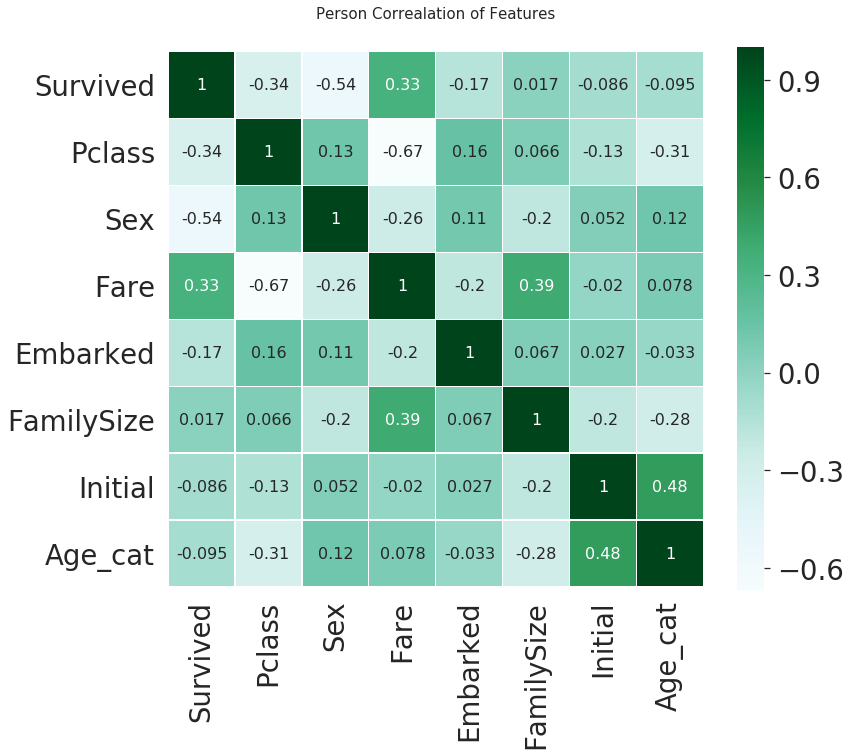

In [88]:
colormap = plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Person Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

### One-hot encoding

- colum을 더 만들어서 모델의 성능을 높이기 위한 방법이다.

In [89]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [90]:
df_train = pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [91]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test =  pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

- 안쓰는 컬럼들을 날려줘야한다, 정리해야한다

In [92]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [93]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [94]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [95]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


> EDA ->  fill in Null -> Feature Engineering -> cleaning

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [97]:

X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [98]:
# df_test.isnull().sum()

In [99]:
df_train.shape

(891, 14)

In [100]:
# X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

- 파라미터 튜닝이 중요하다 이에 따라 알고리즘 성능이 차이가 난다, 많은 경험을 해봐야한다, 

In [101]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
prediction = model.predict(X_vld)

In [103]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [104]:

print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존을 맞춤


In [106]:
(prediction == y_vld).sum()/prediction.shape[0]

0.8208955223880597

### Feature importance
 - 학습을 시키게 되면 무조건 가지고 있다. 학습된 모델이 feature들 중에 가장 영향을 많이 받는지 보여주는거다
    예를들어 f(x) = 10x + 1y + 5와 같은 선형공식이 있다고 가정하면 각 항들 중에 1y보다 10x가 결과에 더 영향을 많이 주는것이다.

In [107]:
model.feature_importances_

array([0.10147436, 0.16694297, 0.32665973, 0.0957135 , 0.11244751,
       0.01170745, 0.02063547, 0.09279738, 0.0309713 , 0.00215792,
       0.0125131 , 0.00928781, 0.0166915 ])

In [108]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [109]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


In [110]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [111]:

from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)


In [112]:
feature_importance

array([0.10147436, 0.16694297, 0.32665973, 0.0957135 , 0.11244751,
       0.01170745, 0.02063547, 0.09279738, 0.0309713 , 0.00215792,
       0.0125131 , 0.00928781, 0.0166915 ])

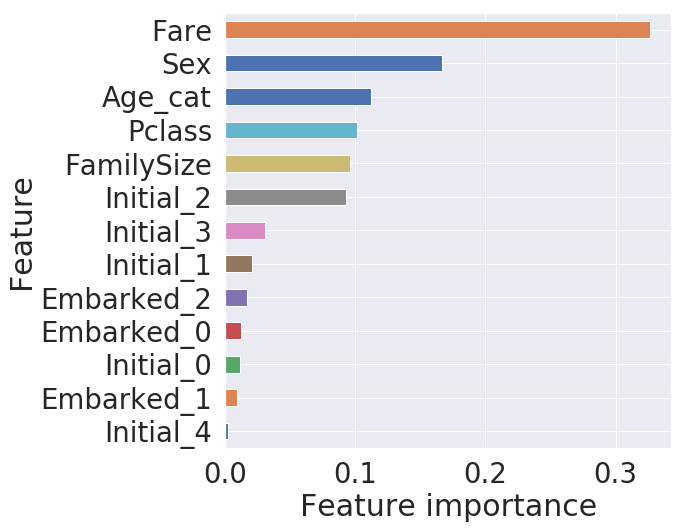

In [113]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


In [114]:
submission = pd.read_csv('../input/gender_submission.csv')

In [115]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
prediction = model.predict(X_test)

In [117]:
submission['Survived'] = prediction

In [118]:
submission.to_csv('./my_first_submission.csv', index=False)